In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels
from statsmodels.stats.weightstats import ztest as zt

**Z- test**

In [2]:
data = pd.read_csv("bloodpressure.csv")

In [3]:
data.shape

(120, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [5]:
import scipy.stats as st
import pylab

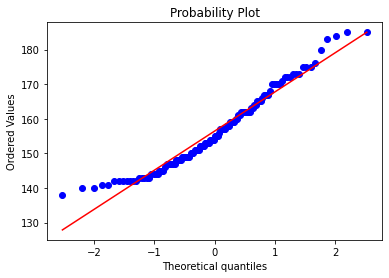

In [6]:
st.probplot(data["bp_before"],dist = "norm",plot = pylab);

In [7]:
data.skew()

C:\Users\ankush\AppData\Local\Temp\ipykernel_2424\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


patient      0.000000
bp_before    0.554244
bp_after     0.393365
dtype: float64

In [8]:
from scipy.stats import boxcox as bxcx

In [9]:
x = bxcx(data["bp_before"])
x[0]

array([0.33448307, 0.33448311, 0.33448309, 0.33448309, 0.33448308,
       0.33448308, 0.33448308, 0.33448309, 0.33448309, 0.3344831 ,
       0.33448308, 0.33448312, 0.33448311, 0.33448307, 0.33448307,
       0.33448309, 0.33448306, 0.33448312, 0.33448307, 0.33448311,
       0.33448308, 0.3344831 , 0.33448309, 0.3344831 , 0.33448311,
       0.33448309, 0.33448309, 0.33448307, 0.33448311, 0.33448309,
       0.33448312, 0.33448313, 0.33448311, 0.33448308, 0.33448312,
       0.3344831 , 0.33448308, 0.33448306, 0.33448313, 0.3344831 ,
       0.3344831 , 0.3344831 , 0.33448311, 0.3344831 , 0.33448313,
       0.33448309, 0.33448312, 0.3344831 , 0.33448312, 0.33448312,
       0.33448312, 0.33448312, 0.33448312, 0.33448312, 0.33448312,
       0.33448311, 0.33448308, 0.33448309, 0.33448312, 0.33448311,
       0.33448309, 0.33448308, 0.33448307, 0.33448307, 0.3344831 ,
       0.33448308, 0.33448309, 0.33448309, 0.33448308, 0.33448305,
       0.33448311, 0.3344831 , 0.33448306, 0.33448311, 0.33448

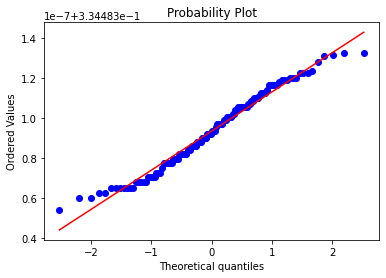

In [10]:
st.probplot(x[0],dist = "norm",plot = pylab);

In [11]:
pd.Series(x[0]).skew()

0.0

In [12]:
pop_mean = x[0].mean()

In [13]:
sample = x[0][0:40]

In [14]:
sample_mean = sample.mean()

In [15]:
round(sample.std(),9)

1.9e-08

In [16]:
# n= 40,alpha  = 0.05, pop_mean,sample_mean,

pop mean = 156.45
sample mean  = 156.25
sample std = 11.44
no. of samples  = 40 
alpha  = 0.05

In [17]:
#pip install statsmodels

In [18]:
from statsmodels.stats.weightstats import ztest

In [19]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la

### One -Sample Z test

In [20]:
zval,pval = ztest(sample,value=pop_mean,alternative = "two-sided")
print(pval,zval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9277110905694753 -0.09072501868926955
accept null hypothesis


In [21]:
zval

-0.09072501868926955

In [22]:
neg_int = sample_mean - zval*(sample.std()/np.sqrt(40))

In [23]:
pos_int = sample_mean + zval*(sample.std()/np.sqrt(40))

In [24]:
ci = neg_int,pos_int

In [25]:
ci

(0.3344830935117993, 0.3344830929725685)

In [26]:
neg = data["bp_before"][0:80].mean()+zval*(data.bp_before.std()/np.sqrt(data.shape[0]))

In [27]:
pos=data["bp_before"][0:80].mean()-zval*(data.bp_before.std()/np.sqrt(data.shape[0]))

In [28]:
ci = neg,pos
ci

(156.8306690385021, 157.01933096149793)

### two Sample Z test

In [31]:
zval1,pval = ztest(s1,data["bp_after"][0:40],value = 10.5,alternative = "two-sided")

NameError: name 's1' is not defined

In [ ]:
pval

In [ ]:
if pval<0.05:
    print("reject Null Hypothesis")
else:
    print("Accept null Hypothesis")

In [ ]:
s2 = data['bp_before'][0:40]
s2.mean()

In [ ]:
neg_int = ((s1.mean() - s2.mean()) - zval*(np.sqrt(((11.44)**2)/40)+((15.62**2)/40)))

In [ ]:
neg_int

In [ ]:
pos_int = ((s1.mean() - s2.mean()) + zval*(np.sqrt(((11.44)**2)/40)+((15.62**2)/40)))

In [ ]:
ci = neg_int,pos_int

In [ ]:
ci

In [ ]:
data["bp_before"].mean() - data.bp_after.mean()

In [ ]:
zt,pval = ztest(data['bp_before'][0:40],x2=data["bp_after"][0:40],value=0,alternative = "two-sided")
print(round(pval,2))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

### One Sample T-test

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np 
import numpy.random

In [ ]:
data = np.random.normal(loc = 30,scale = 8,size = 100)
l = []
for i in data:
    l.append(int(round(i,0)))

In [ ]:
np.mean(l)

In [ ]:
np.median(l)

In [ ]:
len(l)

In [ ]:
## Lets take sample
l = np.array(l)
sample_size=10
age_sample=np.random.choice(l,sample_size)

In [ ]:
age_sample

In [ ]:
age_sample.mean()

In [ ]:
ttest,p_value= ttest_1samp(age_sample,l.mean())

In [ ]:
print(ttest,p_value)

In [ ]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

In [ ]:
df = pd.read_csv("bloodpressure.csv")

In [ ]:
df["bp_before"].mean()

In [ ]:
df["bp_before"][10:20].mean()

In [ ]:
df["bp_before"][10:20].std()

In [ ]:
tval,pval = ttest_1samp(df["bp_before"][10:20],156)
print(tval)
print(pval)

In [ ]:
if pval>0.05:
    print("accept null hypothesis")
else:
    print("reject null hypothesis")

### 2 Sample T-test

In [ ]:
import scipy.stats
import pandas as pd 

In [ ]:
df = pd.read_csv("bloodpressure.csv")

In [ ]:
ttest,pval = scipy.stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

### Chi square test

In [ ]:
import seaborn as sns 

In [ ]:
df = sns.load_dataset("tips")

In [ ]:
df

**Observation Table** 

In [ ]:
dataset_table = pd.crosstab(df['sex'],df['smoker'])
print(dataset_table)

In [ ]:
dataset_table.values

In [ ]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Returns
-------
chi2 : float
    The test statistic.
p : float
    The p-value of the test
dof : int
    Degrees of freedom
expected : ndarray, same shape as `observed`
    The expected frequencies, based on the marginal sums of the table.


In [ ]:
import scipy.stats 

In [ ]:
val=scipy.stats.chi2_contingency(dataset_table)

In [ ]:
val

In [ ]:
if val[1]<0.05:
    print("reject Null , there is relationship between smoker and sex")
else:
    print("accept null , there is no relationship between smoker and sex")

In [ ]:
Expected_Values=val[3]
Expected_Values

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
chi_square_statistic

In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

In [ ]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

### Anova 

In [ ]:
import seaborn as sns

In [ ]:
df1=sns.load_dataset('iris')

In [ ]:
df1

In [ ]:
df_anova = df1[['petal_width','species']]

In [ ]:
grps = pd.unique(df_anova.species.values)

In [ ]:
grps

In [ ]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [ ]:
d_data

In [ ]:
F, p = scipy.stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [ ]:
print(round(p,4))

In [ ]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")